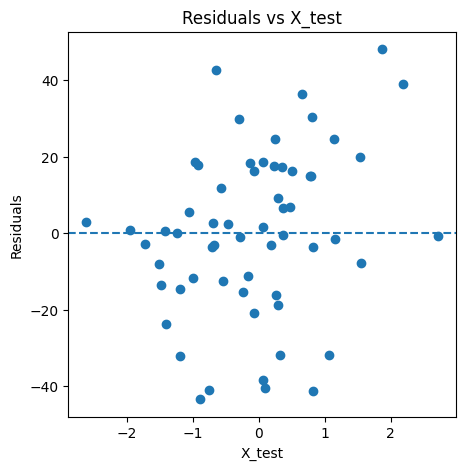

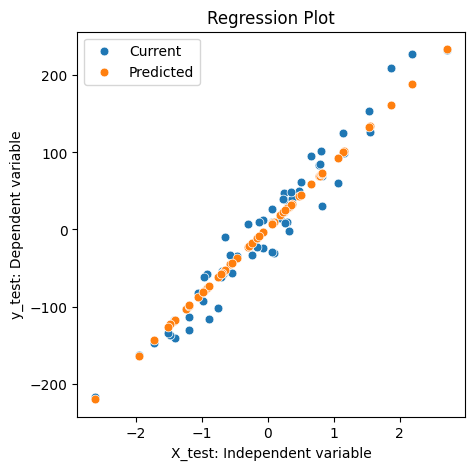

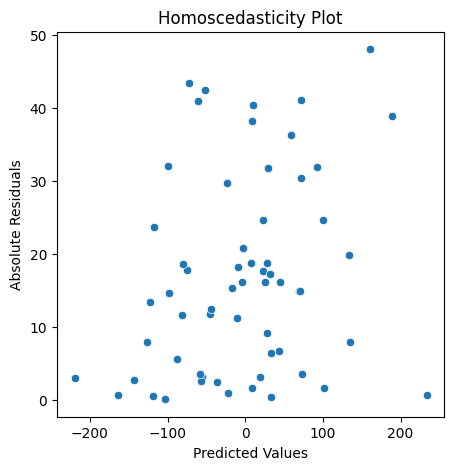

Model with mansions:
Intercept: -225040.03
Slope: 114.59


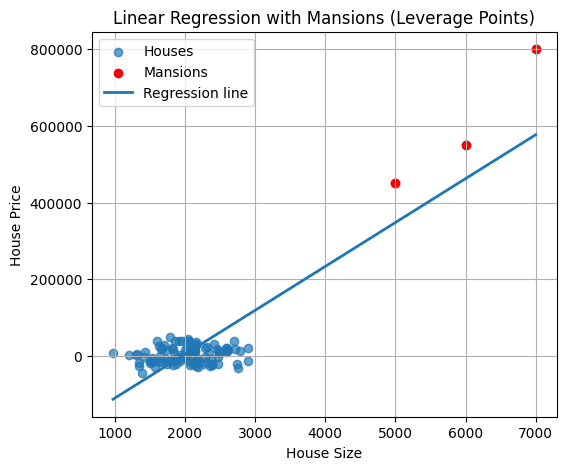

In [1]:
# -*- coding: utf-8 -*-
"""regression_assumptions.py

Versión corregida para correr en local.
"""

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================
# 1. Datos sintéticos y modelo
# ============================

X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

# ============================
# 2. Gráfico de residuales
# ============================

plt.figure(figsize=(5, 5))
plt.scatter(X_test, residuals)
plt.axhline(y=0, linestyle='--')
plt.xlabel('X_test')
plt.ylabel('Residuals')
plt.title('Residuals vs X_test')
plt.show()

# ============================
# 3. Gráfico de regresión
# ============================

plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Current', s=40)
sns.scatterplot(x=X_test.flatten(), y=y_pred, label='Predicted', s=40)
plt.xlabel('X_test: Independent variable')
plt.ylabel('y_test: Dependent variable')
plt.title('Regression Plot')
plt.legend()
plt.show()

# ============================
# 4. Homoscedasticidad
# ============================

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

# ============================
# 5. Leverage points (mansions)
# ============================

import statsmodels.api as sm

# Fijar semilla
np.random.seed(0)

# Casas "normales"
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Agregar mansiones (tamaño muy grande + precio muy alto)
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Ajustar modelo de regresión lineal
X_house = sm.add_constant(house_size)  # agrega intercepto
model_mansion = sm.OLS(house_price, X_house).fit()

# Imprimir parámetros del modelo
print("Model with mansions:")
print(f"Intercept: {model_mansion.params[0]:.2f}")
print(f"Slope: {model_mansion.params[1]:.2f}")

# Ordenar por tamaño para dibujar línea bonita
sorted_idx = np.argsort(house_size)
sorted_size = house_size[sorted_idx]
sorted_pred = model_mansion.params[0] + model_mansion.params[1] * sorted_size

# Graficar
plt.figure(figsize=(6, 5))
plt.scatter(house_size, house_price, label='Houses', alpha=0.7)
plt.scatter(house_size[-3:], house_price[-3:], label='Mansions', color='red')
plt.plot(sorted_size, sorted_pred, label='Regression line', linewidth=2)
plt.title("Linear Regression with Mansions (Leverage Points)")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()
